In [2]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# First, reads in the calibration images and store the
# corresponding object and image points.

# Based on examples.ipynb.

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
img_shape = None

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    # img.shape is roughly the same across calibration images (720-721, 1280-1281).
    img_shape = img.shape
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

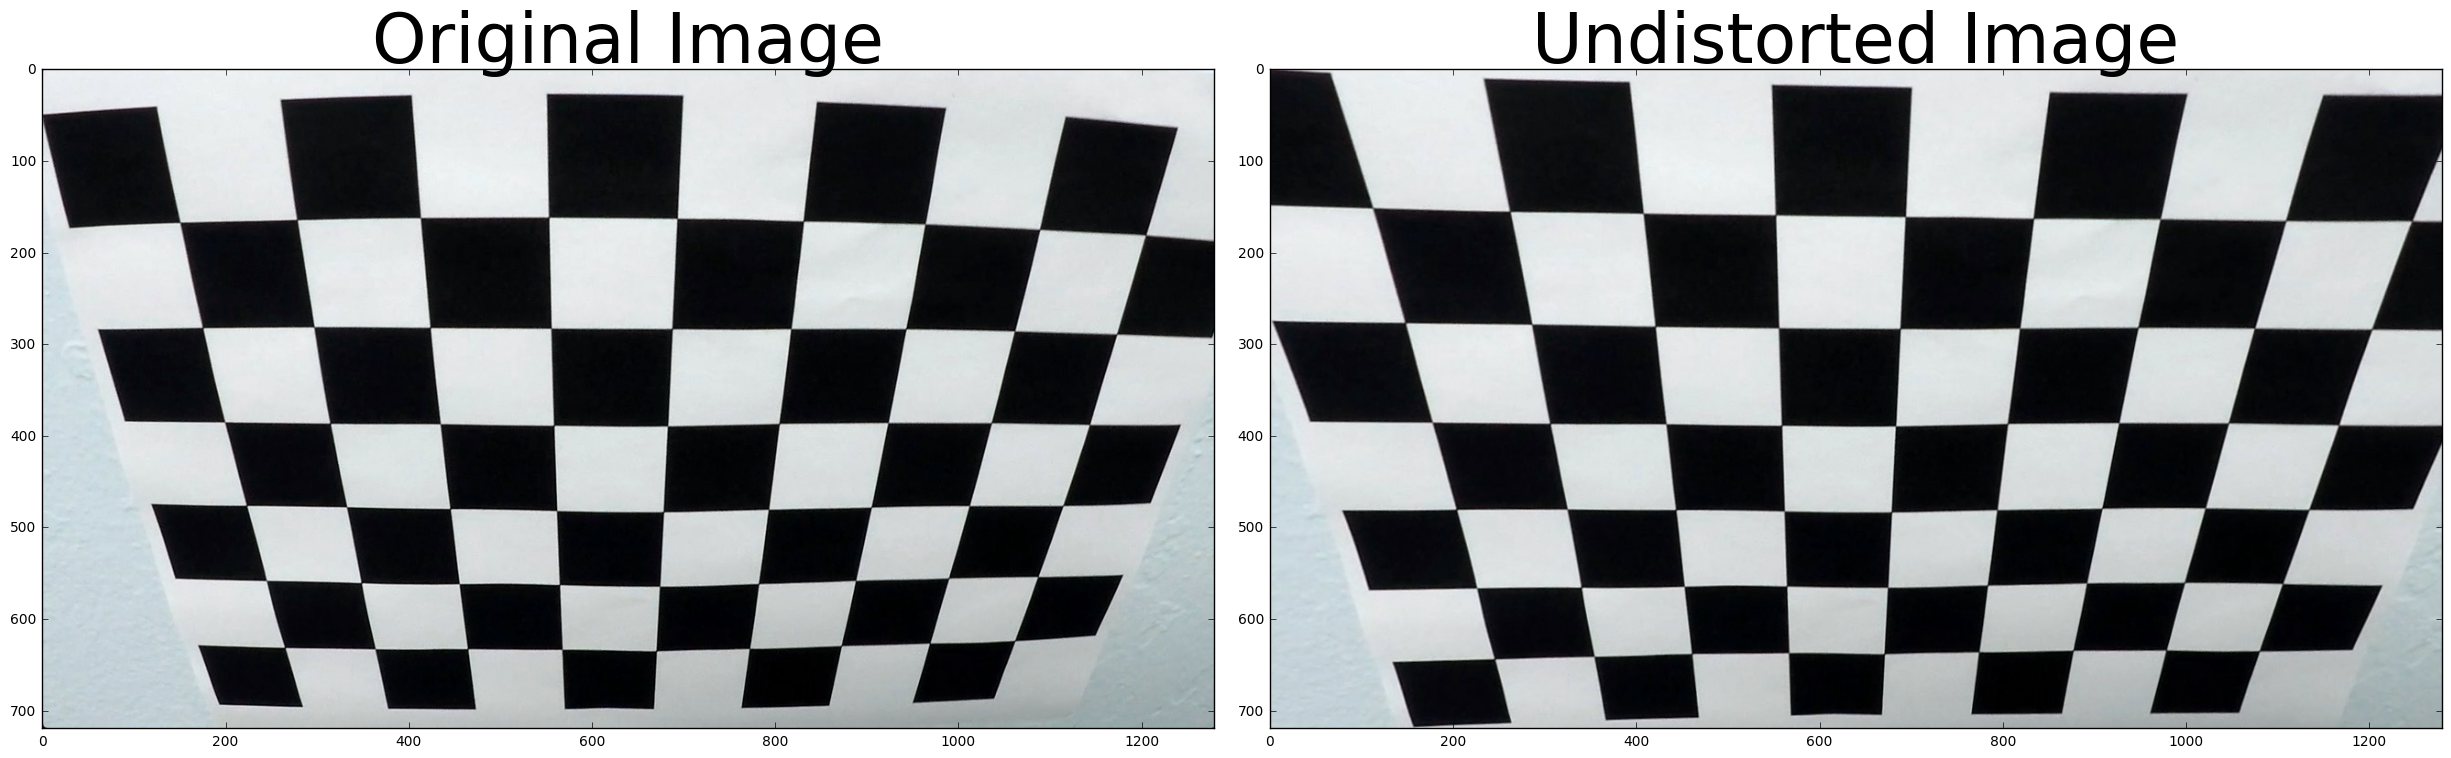

In [11]:
# Next, calibrate the camera based on the objpoints and imgpoints.

# Read in a calibration image
img = cv2.imread('camera_cal/calibration2.jpg')

(retval, cameraMatrix, distCoeffs, rvecs, tvecs) = cv2.calibrateCamera(
    objpoints, imgpoints, img_shape[0:2], None, None)
undistorted = cv2.undistort(img, cameraMatrix, distCoeffs)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Save the figure as an output image.
plt.savefig('output_images/undistorted_calibration2.jpg')